In [1]:
# Load Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('day.csv')
data_ord = data.copy()

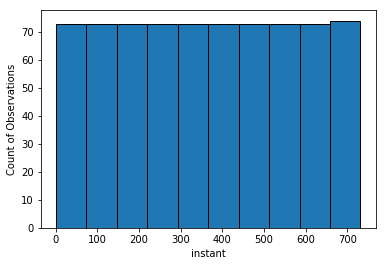

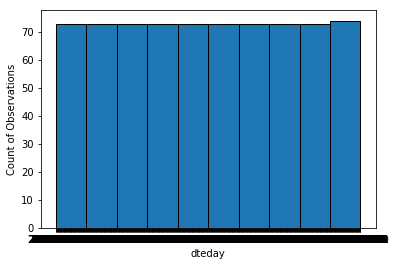

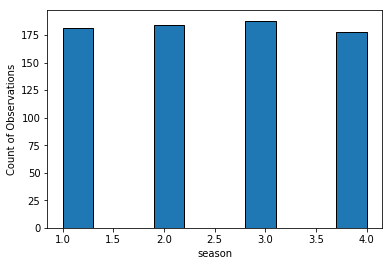

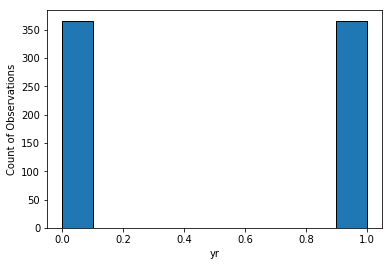

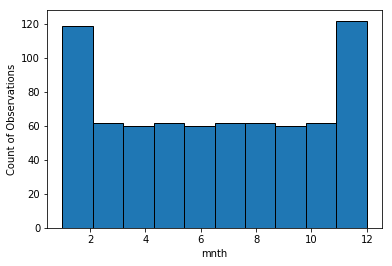

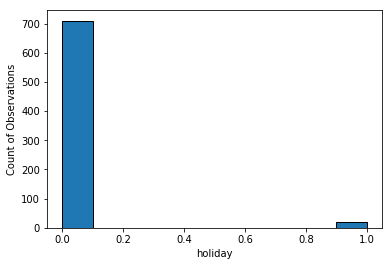

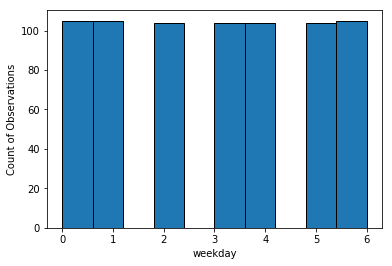

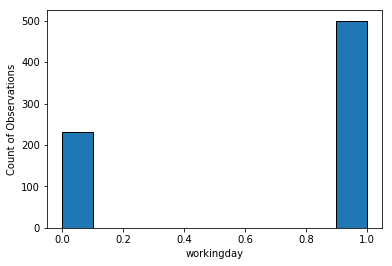

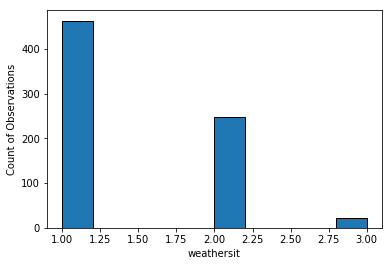

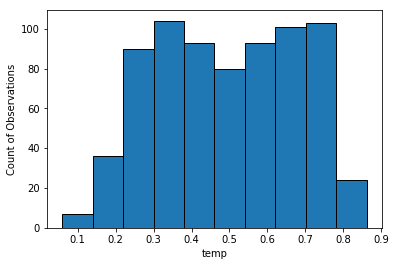

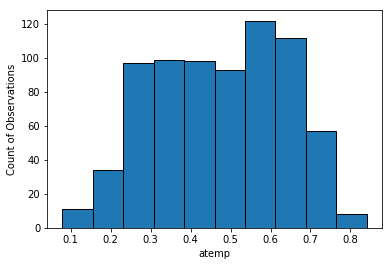

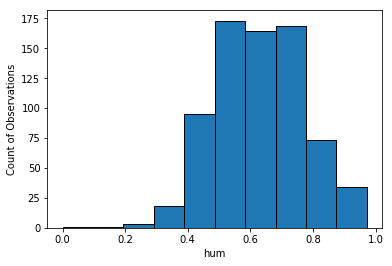

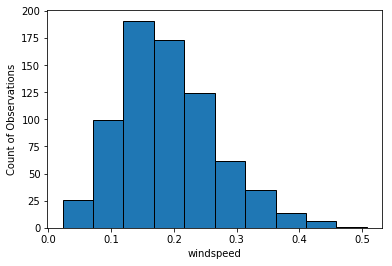

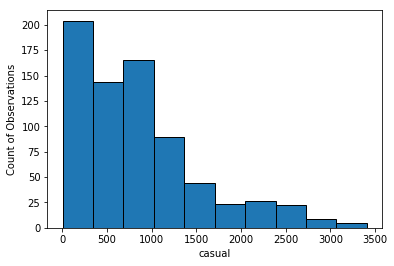

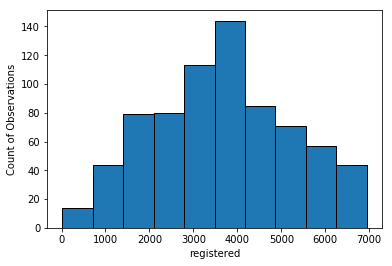

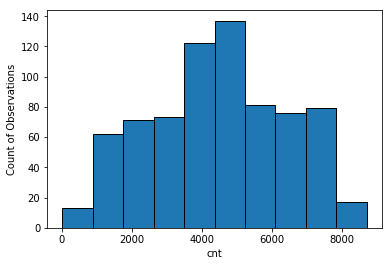

In [3]:
#plt.style.use('seaborn-white')
for i in data.columns :
    plt.figure()
    plt.hist(data[i], alpha = 1, edgecolor = 'black')
    plt.ylabel('Count of Observations')
    plt.xlabel(i)

Text(0,0.5,'cnt')

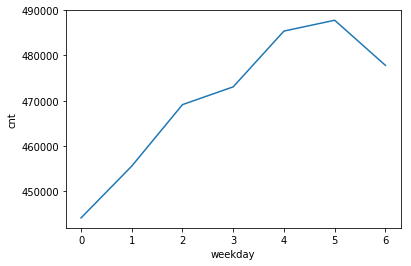

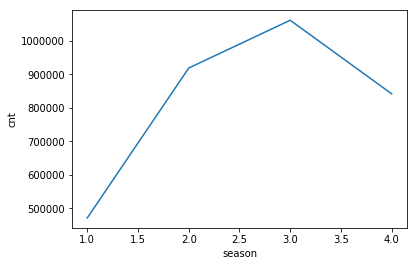

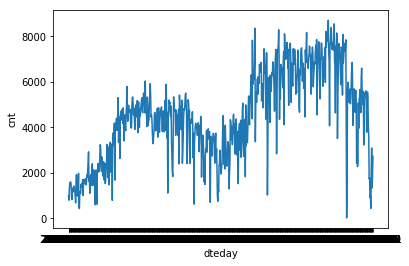

In [4]:
d = data.pivot_table(index='weekday',aggfunc={'cnt':sum})
d = d.reset_index()
plt.plot(d['weekday'],d['cnt'])
plt.xlabel('weekday')
plt.ylabel('cnt')

plt.figure()
d = data.pivot_table(index='season',aggfunc={'cnt':sum})
d = d.reset_index()
plt.plot(d['season'],d['cnt'])
plt.xlabel('season')
plt.ylabel('cnt')


plt.figure()
d = data.pivot_table(index='dteday',aggfunc={'cnt':sum})
d = d.reset_index()
plt.plot(d['dteday'],d['cnt'])
plt.xlabel('dteday')
plt.ylabel('cnt')

In [5]:
data.pivot_table(index='mnth', columns = 'weekday', aggfunc={'cnt':sum})

cnt                                          
weekday      0      1      2      3      4      5      6
mnth                                                    
1        18159  19268  23110  17109  20106  19572  17609
2        17980  20835  22592  25320  23028  23465  18132
3        26408  28365  32166  33030  38170  35332  35449
4        39752  40642  36447  34647  38112  39483  40011
5        47882  40611  50250  46073  53034  46008  47828
6        47523  43826  45447  51309  50596  50547  57094
7        52981  52124  52598  46512  44989  48653  47091
8        37624  49665  53374  60769  54345  53626  41791
9        55436  45097  41476  45346  49370  51723  57543
10       42614  46324  45581  49543  44298  44986  49006
11       33009  37267  36362  37227  35949  40713  34304
12       24659  31479  29706  26163  33398  33682  31949

In [6]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Text(0,0.5,'atemp')

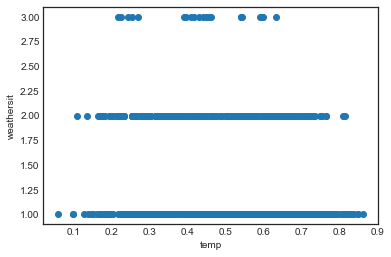

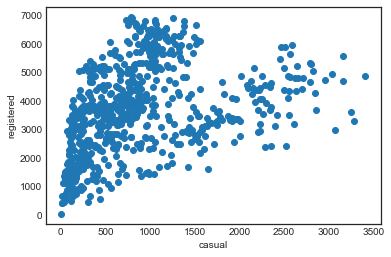

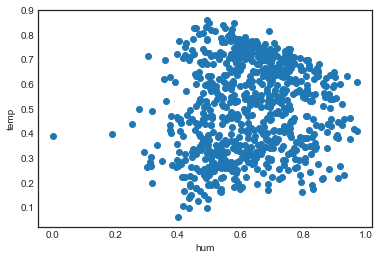

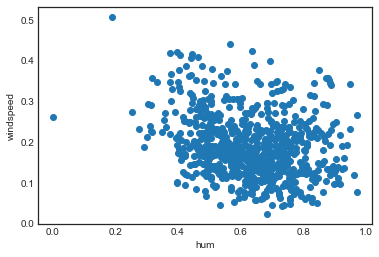

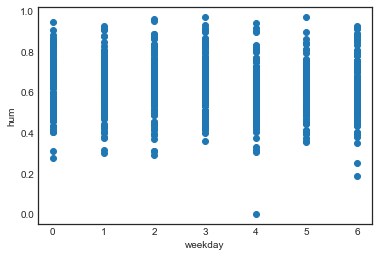

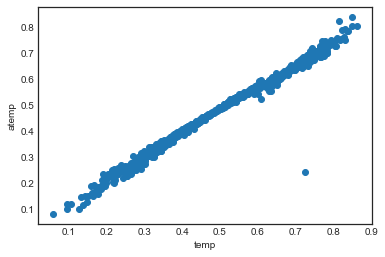

In [7]:
# Scatter Plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

plt.figure()
plt.plot(data['temp'],data['weathersit'],'o')
plt.xlabel('temp')
plt.ylabel('weathersit')

plt.figure()
plt.plot(data['casual'],data['registered'],'o')
plt.xlabel('casual')
plt.ylabel('registered')

plt.figure()
plt.plot(data['hum'],data['temp'],'o')
plt.xlabel('hum')
plt.ylabel('temp')

plt.figure()
plt.plot(data['hum'],data['windspeed'],'o')
plt.xlabel('hum')
plt.ylabel('windspeed')

plt.figure()
plt.plot(data['weekday'],data['hum'],'o')
plt.xlabel('weekday')
plt.ylabel('hum')

plt.figure()
plt.plot(data['temp'],data['atemp'],'o')
plt.xlabel('temp')
plt.ylabel('atemp')

In [8]:
data['season'].unique()

array([1, 2, 3, 4])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWit

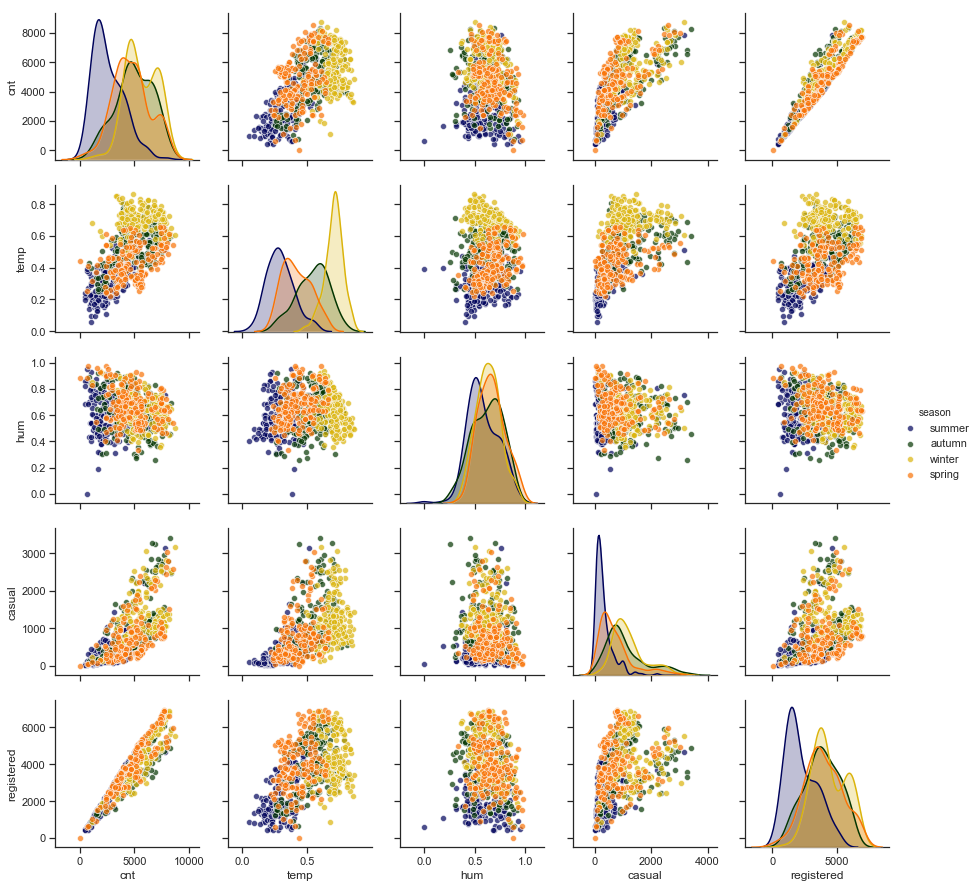

In [9]:
# Scatter Pair Plots
# Create columns of seasons for pair plotting colors
# Seasons (summer (1), autumn (2), winter (3), spring (4))
seasons = data['season']
for i in range(len(seasons)):
    if seasons[i] == 1:
        seasons[i] = 'summer'
    if seasons[i] == 2:
        seasons[i] = 'autumn'
    if seasons[i] == 3:
        seasons[i] = 'winter'
    if seasons[i] == 4:
        seasons[i] = 'spring'

# Will only use six variables for plotting pairs
reduced_features = data[['cnt', 'temp', 'hum', 
                         'casual','registered']].copy()
reduced_features['season'] = seasons
# Use seaborn for pair plots
import seaborn as sns
sns.set(style="ticks", color_codes=True);
# Create a custom color palete
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])
# Make the pair plot with a some aesthetic changes
sns.pairplot(reduced_features, hue = 'season', diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True))


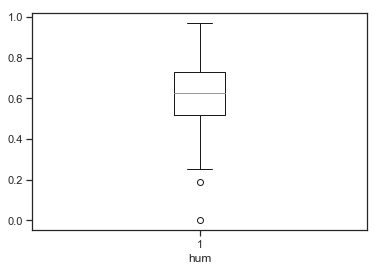

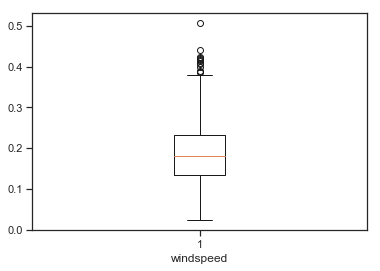

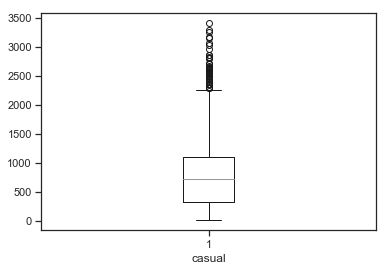

In [10]:
num_var = ['hum', 'windspeed', 'casual']
for i in num_var:
    plt.figure()
    plt.boxplot(data[i])
    plt.xlabel(i)

In [11]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
# data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null object
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(10), object(2)
memory usage: 91.5+ KB


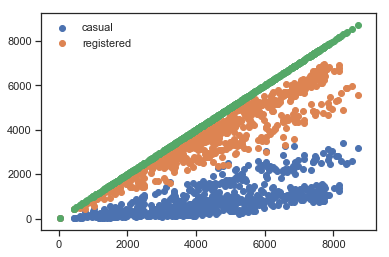

In [13]:
plt.scatter(data['cnt'],data['casual'])
plt.scatter(data['cnt'],data['registered'])
plt.scatter(data['cnt'],data['casual']+data['registered'])
plt.legend()

In [14]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,summer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,summer,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,summer,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,summer,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,summer,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


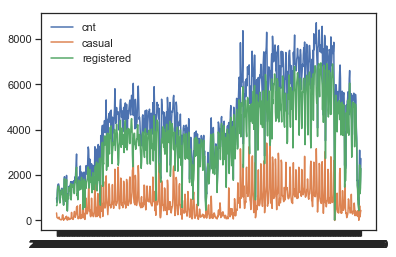

In [15]:
d = data.pivot_table(index='dteday',aggfunc={'cnt':sum})
d = d.reset_index()
plt.plot(d['dteday'],d['cnt'])
d = data.pivot_table(index='dteday',aggfunc={'casual':sum})
d = d.reset_index()
plt.plot(d['dteday'],d['casual'])
d = data.pivot_table(index='dteday',aggfunc={'registered':sum})
d = d.reset_index()
plt.plot(d['dteday'],d['registered'])
plt.legend()